<a href="https://colab.research.google.com/github/MariumAZ/Starbucks-Capstone-Challenge-data/blob/master/Starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import pandas as pd

In [0]:

portfolio=pd.read_json('/content/portfolio.json',orient='records', lines=True)

In [3]:
portfolio.columns

Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id'], dtype='object')

In [4]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [0]:
portfolio=portfolio.rename(columns={"id":"offer_id"})

In [0]:
profile=pd.read_json('/content/profile.json',orient='records', lines=True)

In [7]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


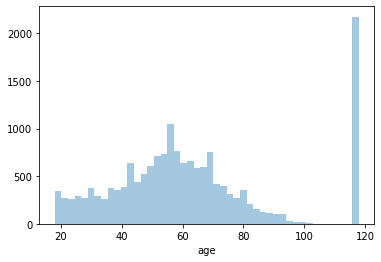

In [8]:
import seaborn as sns
sns.distplot(profile.age,kde=False)

In [0]:
#profile['became_member_on']=pd.to_datetime(profile['became_member_on'],unit='s')

In [10]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [0]:
profile['became_member_on']=profile['became_member_on'].apply(lambda x: str(x))
profile['became_member_on']=profile['became_member_on'].apply(lambda x: x[0:4]+'/'+x[4:6]+'/'+x[6:8])


In [12]:
#profile1 is a copy of profile
profile1=profile.dropna()
profile1.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017/07/15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017/05/09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018/04/26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018/02/09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017/11/11,51000.0


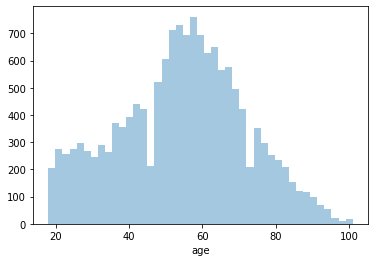

In [13]:

sns.distplot(profile1.age,kde=False)

In [0]:
transcript=pd.read_json('/content/transcript.json',orient='records', lines=True)

In [15]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [0]:
transcript=transcript.rename(columns={"person":"id"})

In [0]:
new= pd.merge(transcript, profile, on='id')

In [18]:
new[0:20]

,id,event,value,time,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,F,75,2017/05/09,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6,F,75,2017/05/09,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,F,75,2017/05/09,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,F,75,2017/05/09,100000.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,F,75,2017/05/09,100000.0
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,F,75,2017/05/09,100000.0
6,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216,F,75,2017/05/09,100000.0
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222,F,75,2017/05/09,100000.0
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240,F,75,2017/05/09,100000.0
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378,F,75,2017/05/09,100000.0


In [19]:
new['id'].value_counts()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
5e60c6aa3b834e44b822ea43a3efea26    48
d0a80415b84c4df4908b8403b19765e3    48
                                    ..
7ecfc592171f4844bdc05bdbb48d3847     2
1bfe13d2453c4185a6486c6817e0d568     2
e63e42480aae4ede9f07cac49c8c3f78     2
912b9f623b9e4b4eb99b6dc919f09a93     2
da7a7c0dcfcb41a8acc7864a53cf60fb     1
Name: id, Length: 17000, dtype: int64

In [0]:
new.dropna(inplace=True)

In [21]:
new.shape

(272762, 8)

In [0]:
offer=new[new['event']=='offer completed']

In [23]:
#Extracting offer _ id and reward from value
offer['offer_id']=offer['value'].apply(lambda x: x['offer_id'] )
offer['reward']=offer['value'].apply(lambda x: x['reward'] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
offer.head()

,id,event,value,time,gender,age,became_member_on,income,offer_id,reward
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,F,75,2017/05/09,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
14,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510,F,75,2017/05/09,100000.0,ae264e3637204a6fb9bb56bc8210ddfd,10
15,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,510,F,75,2017/05/09,100000.0,f19421c1d4aa40978ebb69ca19b0e20d,5
39,e2127556f4f64592b11af22de27a7932,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,522,M,68,2018/04/26,70000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
40,e2127556f4f64592b11af22de27a7932,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,522,M,68,2018/04/26,70000.0,fafdcd668e3743c1bb461111dcafc2a4,2


In [0]:
offer=offer.drop(columns=['value'])

In [0]:
#plot offer_id and age 

In [0]:
import seaborn as sns
sns.set()


In [28]:
offer.columns

Index(['id', 'event', 'time', 'gender', 'age', 'became_member_on', 'income',
       'offer_id', 'reward'],
      dtype='object')

In [29]:
result=pd.merge(portfolio[['offer_type','channels','offer_id']],offer,on='offer_id')
result.head()

,offer_type,channels,offer_id,id,event,time,gender,age,became_member_on,income,reward
0,bogo,"[email, mobile, social]",ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,F,75,2017/05/09,100000.0,10
1,bogo,"[email, mobile, social]",ae264e3637204a6fb9bb56bc8210ddfd,aa4862eba776480b8bb9c68455b8c2e1,offer completed,426,F,61,2017/09/11,57000.0,10
2,bogo,"[email, mobile, social]",ae264e3637204a6fb9bb56bc8210ddfd,4b0da7e80e5945209a1fdddfe813dbe0,offer completed,510,M,64,2017/09/09,100000.0,10
3,bogo,"[email, mobile, social]",ae264e3637204a6fb9bb56bc8210ddfd,102e9454054946fda62242d2e176fdce,offer completed,588,F,69,2016/08/14,57000.0,10
4,bogo,"[email, mobile, social]",ae264e3637204a6fb9bb56bc8210ddfd,a3b9b4bf115e4564933ea2e4bc936843,offer completed,624,F,79,2015/04/15,48000.0,10


In [47]:
#remove data <5% and >95%
q_05=result['age'].quantile(0.05)
print('q_05 : ',q_05)
q_95=result['age'].quantile(0.95)
print('q_095 : ',q_95)
result=result[(result['age']>q_05) & (result['age']<q_95)]

q_05 :  25.0
q_095 :  83.0


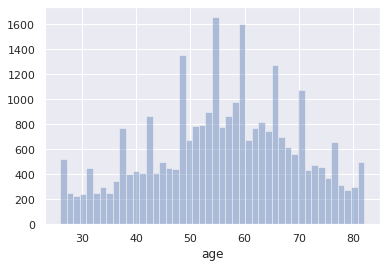

In [51]:
sns.distplot(result['age'],kde=False)

In [0]:
result.groupby(['offer_id']).mean()

In [59]:
result['offer_id'].value_counts()


fafdcd668e3743c1bb461111dcafc2a4    4458
2298d6c36e964ae4a3e7e9706d1fb8c2    4309
9b98b8c7a33c4b65b9aebfe6a799e6d9    3760
f19421c1d4aa40978ebb69ca19b0e20d    3625
2906b810c7d4411798c6938adc9daaa5    3472
ae264e3637204a6fb9bb56bc8210ddfd    3267
0b1e1539f2cc45b7b9fa7c272da2e1d7    3038
4d5c57ea9a6940dd891ad53e9dbe8da0    2973
Name: offer_id, dtype: int64

In [0]:
result1=result[result['offer_id']=='0b1e1539f2cc45b7b9fa7c272da2e1d7']

In [70]:
result1.head()

,offer_type,channels,offer_id,id,event,time,gender,age,became_member_on,income,reward
11155,discount,"[web, email]",0b1e1539f2cc45b7b9fa7c272da2e1d7,4b0da7e80e5945209a1fdddfe813dbe0,offer completed,180,M,64,2017/09/09,100000.0,5
11156,discount,"[web, email]",0b1e1539f2cc45b7b9fa7c272da2e1d7,4b0da7e80e5945209a1fdddfe813dbe0,offer completed,480,M,64,2017/09/09,100000.0,5
11159,discount,"[web, email]",0b1e1539f2cc45b7b9fa7c272da2e1d7,d058f73bf8674a26a95227db098147b1,offer completed,192,F,56,2018/04/28,88000.0,5
11160,discount,"[web, email]",0b1e1539f2cc45b7b9fa7c272da2e1d7,d058f73bf8674a26a95227db098147b1,offer completed,414,F,56,2018/04/28,88000.0,5
11162,discount,"[web, email]",0b1e1539f2cc45b7b9fa7c272da2e1d7,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,474,M,42,2016/01/17,96000.0,5


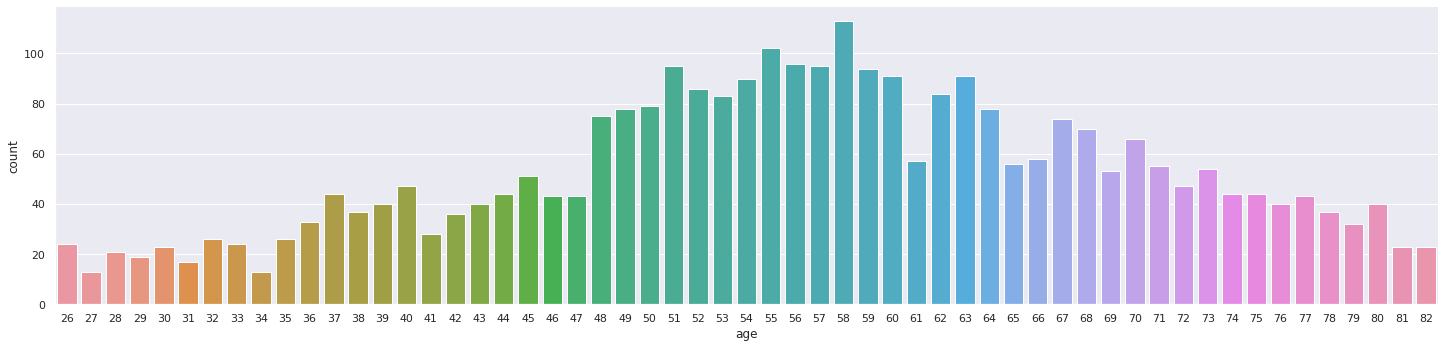

In [71]:
sns.catplot(x='age',data=result1,kind='count',aspect=4)